<a href="https://colab.research.google.com/github/kaamiawan007/pytorch/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: import torch necessary modules to load mnist data for convolutional neural network in pytorch

import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sn



In [2]:
# prompt: Convert MNIST image file into tensor of 4 dimesions
transform=transforms.ToTensor()



In [3]:
# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 14560492.95it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 490225.47it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4466239.45it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4515413.31it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [5]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
pwd

'/content'

In [8]:
# prompt: code for Train and test loader

# Split the dataset into training and testing sets
train_loader = DataLoader(train_dataset, batch_size=10, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


In [9]:
# 2 convolutional layers
convolve1 = nn.Conv2d(1, 6, 3, 1)
convolve2 = nn.Conv2d(6, 16, 3, 1)

In [10]:
#Grab 1 MNIS record
for i, (X_train, y_train) in enumerate(train_dataset):
    break

In [11]:
X_train.shape

torch.Size([1, 28, 28])

In [12]:
x = X_train.view(1, 1, 28, 28)

In [13]:
#Performing first Covolution
x =F.relu(convolve1(x)) #Rectified Linear Unit for activation funtion

In [14]:
x.shape

torch.Size([1, 6, 26, 26])

In [15]:
# Pass through the pooling layer
x = F.max_pool2d(x, 2, 2) #kernal of 2 and stride of 2

In [16]:
x.shape

torch.Size([1, 6, 13, 13])

In [17]:
#Doing 2nd convolutional layer
x = F.relu(convolve2(x))

In [18]:
x.shape

torch.Size([1, 16, 11, 11])

In [19]:
#pooling layer
x = F.max_pool2d(x, 2, 2)

In [20]:
x.shape

torch.Size([1, 16, 5, 5])

In [21]:
#CNN Model
class ConvlultinalClass(nn.Module):
  def __init__(self):
    super(ConvlultinalClass, self).__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    #Fully connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)
    # Forward Function
  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) #2,2 kernal and stride of 2
    #2nd pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)
    #Revie data to Flatten it out
    X = X.view(-1,5*5*16) #Negative is to vary the batch size
    #Fully Connected layer
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)

In [22]:
# Creat an isntance of our model
torch.manual_seed(41)
model = ConvlultinalClass()

In [23]:
model

ConvlultinalClass(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
#Loss function optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [25]:
#Training CNN Model
import time
start_time = time.time()
# Variables to track things
epohcs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#For Loops of Epochs
for i in range(epohcs):
  trn_corr = 0
  tst_corr = 0
  #Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b+=1 #start our batches on 1
    y_pred = model(X_train) #get predicted the values from the training set Not Flattened it's 2D
    loss = criterion(y_pred, y_train) #calculate the loss, how off are we? predict the correct answer in y_train
    predicted = torch.max(y_pred.data, 1)[1] #Add up the numbers of correct prediction. indexed of first point
    batch_corr = (predicted == y_train).sum() #how many we got correct form this specific batch
    trn_corr += batch_corr #keep track as we go long in training

    #Update our Parameters

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #Print out some results
    if b%600 == 0:
      print(f'epoch: {i} loss: {loss.item()} batch: {b}')
  train_losses.append(loss)
  train_correct.append(trn_corr)

  #Test
  with torch.no_grad(): # we don't update biases and weights on test data
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

      loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)

current_time = time.time()
total_time = current_time - start_time
print(f' training took: {total_time/60} minutes')

epoch: 0 loss: 0.05410553887486458 batch: 600
epoch: 0 loss: 0.2919285297393799 batch: 1200
epoch: 0 loss: 0.20169854164123535 batch: 1800
epoch: 0 loss: 0.5066352486610413 batch: 2400
epoch: 0 loss: 0.022063154727220535 batch: 3000
epoch: 0 loss: 0.5132097601890564 batch: 3600
epoch: 0 loss: 0.006905452348291874 batch: 4200
epoch: 0 loss: 0.11871694028377533 batch: 4800
epoch: 0 loss: 0.3278399705886841 batch: 5400
epoch: 0 loss: 0.017452383413910866 batch: 6000
epoch: 1 loss: 0.004546534735709429 batch: 600
epoch: 1 loss: 0.007160590495914221 batch: 1200
epoch: 1 loss: 0.03086325153708458 batch: 1800
epoch: 1 loss: 0.05906737595796585 batch: 2400
epoch: 1 loss: 0.7997595071792603 batch: 3000
epoch: 1 loss: 0.09846098721027374 batch: 3600
epoch: 1 loss: 0.0017122880090028048 batch: 4200
epoch: 1 loss: 2.055034929071553e-05 batch: 4800
epoch: 1 loss: 0.0006268079159781337 batch: 5400
epoch: 1 loss: 0.4657449722290039 batch: 6000
epoch: 2 loss: 0.30277401208877563 batch: 600
epoch: 2 lo

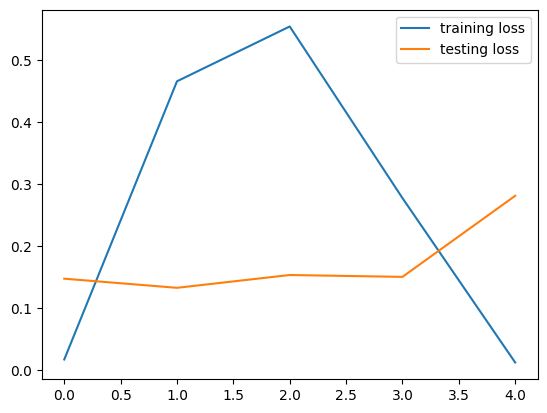

In [26]:
#Graph the loss at epochs
train_losses = [tl.item() for tl in train_losses]
#test_losses = [tl.item() for tl in test_losses]
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='testing loss')
plt.legend()
plt.show()

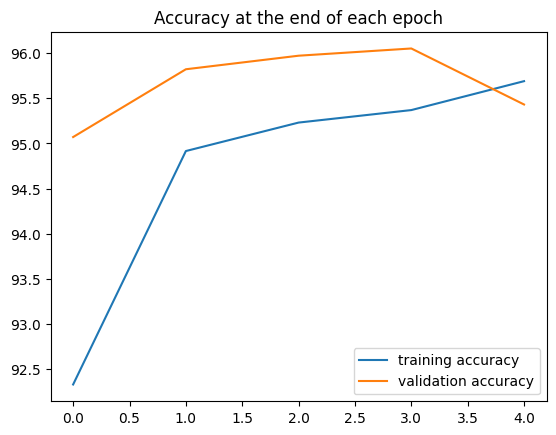

In [27]:
# prompt: Graph the accoracy at the end of each epochs

import matplotlib.pyplot as plt
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();


In [28]:
# prompt: code to see acturla number how correct we were
test_loader_everythin = DataLoader(test_dataset, batch_size=10000, shuffle=False)

#print(test_correct) # prints a list of how many we got correct at each epoch
#print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # prints the final test accuracy


In [29]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_loader_everythin:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()
  print(f'Test accuracy: {correct.item()*100/10000:.3f}%')

Test accuracy: 95.430%
